In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/iris/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.drop('Id', axis=1, inplace=True)

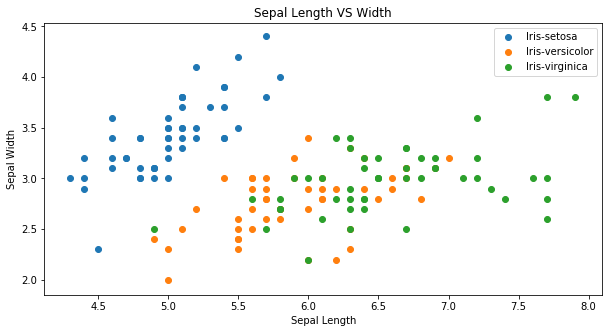

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(data[data.Species=='Iris-setosa']['SepalLengthCm'], data[data.Species=='Iris-setosa']['SepalWidthCm'], 
            label='Iris-setosa')
plt.scatter(data[data.Species=='Iris-versicolor']['SepalLengthCm'], data[data.Species=='Iris-versicolor']['SepalWidthCm'], 
            label='Iris-versicolor')
plt.scatter(data[data.Species=='Iris-virginica']['SepalLengthCm'], data[data.Species=='Iris-virginica']['SepalWidthCm'], 
            label='Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length VS Width")
plt.legend()
plt.show()

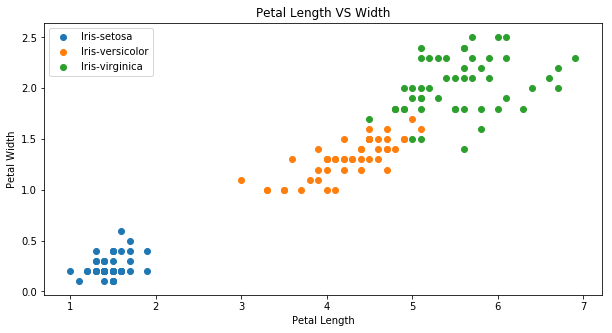

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(data[data.Species=='Iris-setosa']['PetalLengthCm'], data[data.Species=='Iris-setosa']['PetalWidthCm'], 
            label='Iris-setosa')
plt.scatter(data[data.Species=='Iris-versicolor']['PetalLengthCm'], data[data.Species=='Iris-versicolor']['PetalWidthCm'], 
            label='Iris-versicolor')
plt.scatter(data[data.Species=='Iris-virginica']['PetalLengthCm'], data[data.Species=='Iris-virginica']['PetalWidthCm'], 
            label='Iris-virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length VS Width")
plt.legend()
plt.show()

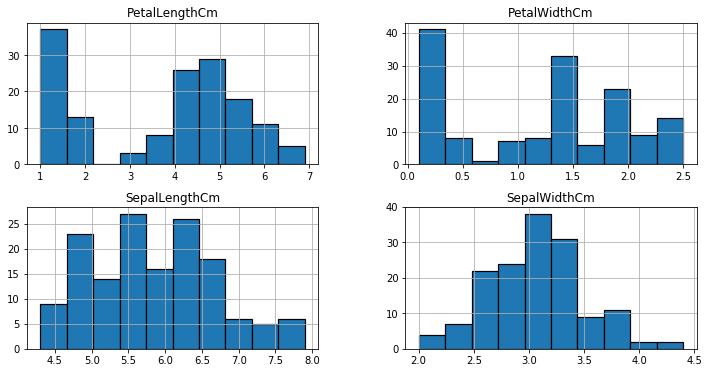

In [8]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

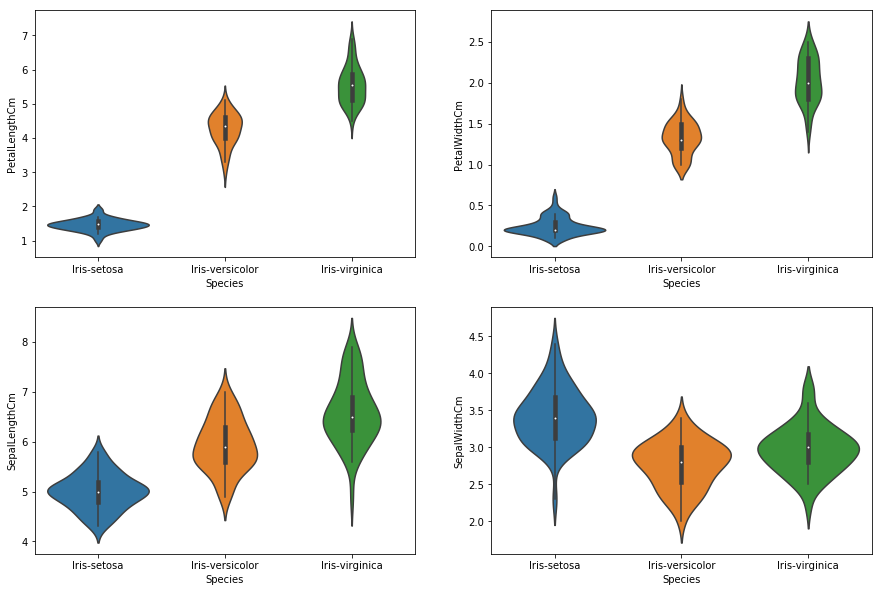

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [10]:
data.shape

(150, 5)

In [11]:
data.head()
x_train, x_test, y_train, y_test = train_test_split(data.drop('Species', axis=1), data.Species, test_size=.33, random_state=101)

In [12]:
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
prediction = model_svm.predict(x_test)
acc_svm = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the SVM:', acc_svm)

The accuracy of the SVM: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
model_logistic_reg = LogisticRegression()
model_logistic_reg.fit(x_train, y_train)
prediction = model_logistic_reg.predict(x_test)
acc_logistic_reg = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the Logistic Regression:', acc_logistic_reg)

The accuracy of the Logistic Regression: 0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(x_train, y_train)
prediction = model_decision_tree.predict(x_test)
acc_decision_tree = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the Decision Tree:', acc_decision_tree)

The accuracy of the Decision Tree: 0.96


In [15]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
prediction = model_knn.predict(x_test)
acc_knn = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the KNN:', acc_knn)

The accuracy of the KNN: 1.0


In [16]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Decision Tree', 'KNN'],
    'Score': [acc_svm, acc_logistic_reg, acc_decision_tree, acc_knn]
    })

models

,Model,Score
0,Support Vector Machines,1.00
1,Logistic Regression,0.96
2,Decision Tree,0.96
3,KNN,1.00


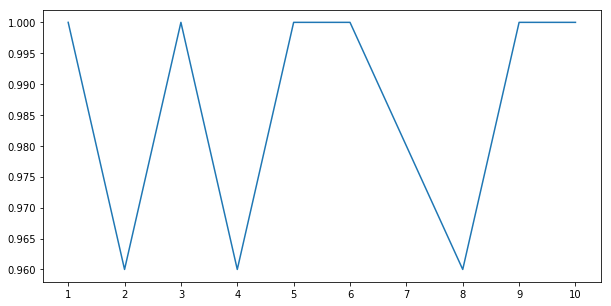

In [17]:
accuracies = []
x = [i for i in range(1, 11)]
for i in x:
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    accuracies.append(metrics.accuracy_score(prediction, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(x, accuracies)
plt.xticks(x)
plt.show()

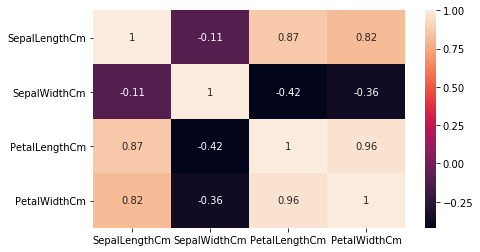

In [18]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [20]:
sx_train, sx_test, sy_train, sy_test = train_test_split(data[["SepalLengthCm", "SepalWidthCm"]], data.Species, 
                                                        test_size=.33, random_state=101)
px_train, px_test, py_train, py_test = train_test_split(data[["PetalLengthCm", "PetalWidthCm"]], data.Species, 
                                                        test_size=.33, random_state=101)

In [21]:
model_svm = svm.SVC()
model_svm.fit(sx_train, sy_train)
prediction = model_svm.predict(sx_test)
acc_s_svm = metrics.accuracy_score(prediction, sy_test)
print('The accuracy of the SVM using Sepal:', acc_s_svm)

model_svm = svm.SVC()
model_svm.fit(px_train, py_train)
prediction = model_svm.predict(px_test)
acc_p_svm = metrics.accuracy_score(prediction, py_test)
print('The accuracy of the SVM using Petal:', acc_p_svm)

The accuracy of the SVM using Sepal: 0.78
The accuracy of the SVM using Petal: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
model_logistic_reg = LogisticRegression()
model_logistic_reg.fit(sx_train, sy_train)
prediction = model_logistic_reg.predict(sx_test)
acc_s_logistic_reg = metrics.accuracy_score(prediction, sy_test)
print('The accuracy of the Logistic Regresion using Sepal:', acc_s_logistic_reg)

model_logistic_reg = LogisticRegression()
model_logistic_reg.fit(px_train, py_train)
prediction = model_logistic_reg.predict(px_test)
acc_p_logistic_reg = metrics.accuracy_score(prediction, py_test)
print('The accuracy of the Logistic Regression using Petal:', acc_p_logistic_reg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regresion using Sepal: 0.54
The accuracy of the Logistic Regression using Petal: 0.64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(sx_train, sy_train)
prediction = model_decision_tree.predict(sx_test)
acc_s_decision_tree = metrics.accuracy_score(prediction, sy_test)
print('The accuracy of the Decision Tree using Sepal:', acc_s_decision_tree)

model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(px_train, py_train)
prediction = model_decision_tree.predict(px_test)
acc_p_decision_tree = metrics.accuracy_score(prediction, py_test)
print('The accuracy of the Decision Tree using Petal:', acc_p_decision_tree)

The accuracy of the Decision Tree using Sepal: 0.6
The accuracy of the Decision Tree using Petal: 0.96


In [24]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(sx_train, sy_train)
prediction = model_knn.predict(sx_test)
acc_s_knn = metrics.accuracy_score(prediction, sy_test)
print('The accuracy of the KNN using Sepal:', acc_s_knn)

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(px_train, py_train)
prediction = model_knn.predict(px_test)
acc_p_knn = metrics.accuracy_score(prediction, py_test)
print('The accuracy of the KNN using Petal:', acc_p_knn)

The accuracy of the KNN using Sepal: 0.66
The accuracy of the KNN using Petal: 0.98


In [25]:
sepal_accs = [acc_s_svm, acc_s_logistic_reg, acc_s_decision_tree, acc_s_knn]
petal_accs = [acc_p_svm, acc_p_logistic_reg, acc_p_decision_tree, acc_p_knn]
accs = [sepal_accs, petal_accs]

models = pd.DataFrame(accs, index=['Using Sepal', 'Using Petal'], columns=['SVM', 'Logistic Reg', 'Decision Tree', 'KNN'])
models

,SVM,Logistic Reg,Decision Tree,KNN
Using Sepal,0.78,0.54,0.60,0.66
Using Petal,0.98,0.64,0.96,0.98
